In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df_clean = pd.read_csv('df_for_sirius_clean.csv', sep = ',')

In [ ]:
df = pd.read_csv('dataset_for_sirius.csv', sep = ',')

In [ ]:
#df_clean = pd.read_csv('df_for_sirius_clean.csv', sep = ',')
users_with_clusters = pd.read_csv('users_with_clusters.csv', sep = ',')

In [ ]:
df_users_clusters = pd.merge(df_clean, users_with_clusters[['id', 'cluster']], on='id', how='left')

In [ ]:
df_by_date_general = df_users_clusters.groupby(by='expiration_minus_1d_dt', as_index=False).agg({'target': 'sum'})
df_by_date_general = df_by_date_general.rename(columns={'expiration_minus_1d_dt': 'date', 'target': 'target_1_cnt'})
df_by_date_general['date'] = pd.to_datetime(df_by_date_general['date'], format='%Y-%m-%d')

In [ ]:
def save_clusters_to_csv(df_users_clusters, output_dir='clusters'):

    # Создаем директорию, если ее нет
    os.makedirs(output_dir, exist_ok=True)

    clusters = df_users_clusters['cluster'].unique()
    saved_files = []

    for cluster in clusters:
        # Фильтруем данные по кластеру
        cluster_df = df_users_clusters[df_users_clusters['cluster'] == cluster]

        # Формируем имя файла
        filename = f"{output_dir}/cluster_{cluster}.csv"

        # Сохраняем в CSV
        cluster_df.to_csv(filename, index=False)
        saved_files.append(filename)

        print(f"Сохранен кластер {cluster} в файл {filename}")

    return saved_files

    # Сохраняем кластеры
saved_files = save_clusters_to_csv(df_users_clusters)

print("\nСохраненные файлы:")
for file in saved_files:
    print(file)

Сохранен кластер 6 в файл clusters/cluster_6.csv
Сохранен кластер 0 в файл clusters/cluster_0.csv
Сохранен кластер 4 в файл clusters/cluster_4.csv
Сохранен кластер 1 в файл clusters/cluster_1.csv
Сохранен кластер 3 в файл clusters/cluster_3.csv
Сохранен кластер 2 в файл clusters/cluster_2.csv
Сохранен кластер 5 в файл clusters/cluster_5.csv

Сохраненные файлы:
clusters/cluster_6.csv
clusters/cluster_0.csv
clusters/cluster_4.csv
clusters/cluster_1.csv
clusters/cluster_3.csv
clusters/cluster_2.csv
clusters/cluster_5.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
df_cluster_0 = pd.read_csv('clusters/cluster_0.csv', sep = ',')
df_cluster_1 = pd.read_csv('clusters/cluster_1.csv', sep = ',')
df_cluster_2 = pd.read_csv('clusters/cluster_2.csv', sep = ',')
df_cluster_3 = pd.read_csv('clusters/cluster_3.csv', sep = ',')
df_cluster_4 = pd.read_csv('clusters/cluster_4.csv', sep = ',')
df_cluster_5 = pd.read_csv('clusters/cluster_5.csv', sep = ',')
df_cluster_6 = pd.read_csv('clusters/cluster_6.csv', sep = ',')

In [ ]:
df_cluster_3.head()

expiration_minus_1d_dt      id  target  renewal_amt  \
0             2024-02-28  495938       1          200   
1             2024-09-13  537479       0          200   
2             2024-11-03  500087       0          100   
3             2024-10-16  464479       0          200   
4             2024-11-03   39268       0         1000   

   one_prc_loyalty_accrual_rub_amt  sovokupnyj_balans  sovokupnye_traty  \
0                              0.0              200.0              20.0   
1                              0.0             1000.0              20.0   
2                              0.0              100.0              20.0   
3                              0.0              200.0              20.0   
4                              2.0             1000.0              20.0   

   median_monthly_income_amt  monthly_income_amt  \
0                      100.0                20.0   
1                        0.0               100.0   
2                      200.0               100.0   
3                      100.0               100.0   
4                        0.0                20.0   

   avg_integral_cur_rur_balance  ...  diff_alfa_bank_12_mean  \
0                           2.0  ...                1.837500   
1                          20.0  ...                2.181667   
2                         100.0  ...                2.181667   
3                           0.0  ...                2.181667   
4                           2.0  ...                2.181667   

   diff_alfa_bank_6_mean  diff_alfa_bank_3_mean  cashback_category_flg  \
0                  1.245               1.490000                    0.0   
1                  1.230              -0.113929                    1.0   
2                  1.230              -0.113929                    1.0   
3                  1.230              -0.113929                    0.0   
4                  1.230              -0.113929                    1.0   

   Account_Type  sum_cashback_categ  sum_cashback_target  insurance  \
0           0.0                 0.0                  0.0        0.0   
1           1.0               119.0                  0.0        1.0   
2           0.0                 0.0                  0.0        0.0   
3           0.0                 0.0                  0.0        0.0   
4           0.0                 0.0                  0.0        0.0   

   transactions  cluster  
0           0.0        3  
1           2.0        3  
2           1.0        3  
3           0.0        3  
4           5.0        3  

[5 rows x 240 columns]

In [ ]:
df_cluster_3['sum_cashback_categ']

0         0.0
1       119.0
2         0.0
3         0.0
4         0.0
        ...  
1659     31.0
1660      0.0
1661      0.0
1662      0.0
1663      NaN
Name: sum_cashback_categ, Length: 1664, dtype: float64

In [ ]:
df_cluster_3['sum_cashback_target']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1659    0.0
1660    0.0
1661    0.0
1662    0.0
1663    NaN
Name: sum_cashback_target, Length: 1664, dtype: float64

#Рассмотрим кэшбеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


clusters = []
for i in range(7):
    df_i = pd.read_csv(f'clusters/cluster_{i}.csv', sep=',')
    df_i['cluster'] = f'cluster_{i}'  # Добавляем метку кластера
    clusters.append(df)

# Объединение всех кластеров в один DataFrame
#df_all = pd.concat(clusters, ignore_index=True)

# 1. Анализ общей кэшбек-активности по кластерам
# Создаем список денежных столбцов кэшбека
cashback_cols = [
    'sum_cashback_target',
    'sum_cashback_categ'

]


In [ ]:

df_i['total_cashback'] = df_i[cashback_cols].sum(axis=1)

In [ ]:
cluster_cash = df.groupby('cluster')['total_cashback'].agg(['sum', 'mean', 'count']).reset_index()
cluster_cash.columns = ['Кластер', 'Суммарный кэшбек', 'Средний кэшбек', 'Кол-во пользователей']


cluster_cash_sorted = cluster_cash.sort_values('Суммарный кэшбек', ascending=False)

# 2. Анализ популярных категорий по кластерам
def analyze_categories(df_cluster):
    # Собираем все категории из трех колонок
    all_categories = pd.concat([
        df_cluster['first_category'],
        df_cluster['second_category'],
        df_cluster['third_category']
    ])

    # Удаляем пропущенные значения
    all_categories = all_categories.dropna()

    # Топ-5 самых частых категорий
    top_categories = all_categories.value_counts().head(5).reset_index()
    top_categories.columns = ['Категория', 'Частота']

    return top_categories

# Анализ для каждого кластера
category_results = {}
for cluster in df['cluster'].unique():
    cluster_df = df[df['cluster'] == cluster]
    category_results[cluster] = analyze_categories(cluster_df)

# 3. Визуализация результатов
plt.figure(figsize=(14, 10))

# График суммарного кэшбека по кластерам
plt.subplot(2, 1, 1)
sns.barplot(data=cluster_cash_sorted,
            x='Кластер',
            y='Суммарный кэшбек',
            palette='viridis')
plt.title('Суммарный кэшбек по кластерам')
plt.ylabel('Общая сумма кэшбека')
plt.xlabel('Кластер')

# График среднего кэшбека на пользователя
plt.subplot(2, 1, 2)
sns.barplot(data=cluster_cash_sorted,
            x='Кластер',
            y='Средний кэшбек',
            palette='coolwarm')
plt.title('Средний кэшбек на пользователя по кластерам')
plt.ylabel('Средняя сумма кэшбека')
plt.xlabel('Кластер')

plt.tight_layout()
plt.show()


KeyError: 'cluster'

In [ ]:
# 4. Вывод результатов
print("Топ кластеров по суммарному кэшбеку:")
print(cluster_cash_sorted[['Кластер', 'Суммарный кэшбек', 'Средний кэшбек']])
print("\nПопулярные категории по кластерам:")
for cluster, data in category_results.items():
    print(f"\n{cluster}:")
    print(data.to_string(index=False))

конец

In [ ]:
def make_df_by_date_cluster(df_cluster_num):
  df_by_date = df_cluster_num.groupby(by='expiration_minus_1d_dt', as_index=False).agg({'target': 'sum'})
  df_by_date = df_by_date.rename(columns={'expiration_minus_1d_dt': 'date', 'target': 'target_1_cnt'})

  return df_by_date

In [ ]:
df_by_date_cluster_0 = make_df_by_date_cluster(df_cluster_0)
df_by_date_cluster_1 = make_df_by_date_cluster(df_cluster_1)
df_by_date_cluster_2 = make_df_by_date_cluster(df_cluster_2)
df_by_date_cluster_3 = make_df_by_date_cluster(df_cluster_3)
df_by_date_cluster_4 = make_df_by_date_cluster(df_cluster_4)
df_by_date_cluster_5 = make_df_by_date_cluster(df_cluster_5)
df_by_date_cluster_6 = make_df_by_date_cluster(df_cluster_6)

In [ ]:
df_by_date_cluster_0.head()

date  target_1_cnt
0  2024-01-01            25
1  2024-01-02            25
2  2024-01-03            19
3  2024-01-04            12
4  2024-01-05            11

In [ ]:
df_by_date_cluster_02 = pd.merge(df_by_date_cluster_0, df_by_date_cluster_2, on='date', how='inner')
df_by_date_cluster_02['target_1_cnt'] = df_by_date_cluster_02['target_1_cnt_y'] + df_by_date_cluster_02['target_1_cnt_x']
df_by_date_cluster_02 = df_by_date_cluster_02.drop(columns = ['target_1_cnt_x', 'target_1_cnt_y'])

date  target_1_cnt
0 2024-01-01            56
1 2024-01-02            43
2 2024-01-03            39
3 2024-01-04            25
4 2024-01-05            26

In [ ]:
df_temp = pd.merge(df_by_date_cluster_3, df_by_date_cluster_4, on='date', how='inner')
df_by_date_cluster_345 = pd.merge(df_temp, df_by_date_cluster_5, on='date', how='inner')
df_by_date_cluster_345['target_1_cnt'] = df_by_date_cluster_345['target_1_cnt_y'] + df_by_date_cluster_345['target_1_cnt_x'] + df_by_date_cluster_345['target_1_cnt']
df_by_date_cluster_345 = df_by_date_cluster_345.drop(columns = ['target_1_cnt_x', 'target_1_cnt_y', ])

date  target_1_cnt
0 2024-01-01            36
1 2024-01-02            49
2 2024-01-03            45
3 2024-01-04            35
4 2024-01-05            37

In [ ]:
def create_target_column_cluster_num(df_by_date):

  target_column = df_by_date[['date', 'target_1_cnt']]
  target_column['date'] = pd.to_datetime(target_column['date'], format='%Y-%m-%d')
  return target_column

In [ ]:
target_column_cluster_0 = create_target_column_cluster_num(df_by_date_cluster_0)
target_column_cluster_1 = create_target_column_cluster_num(df_by_date_cluster_1)
target_column_cluster_2 = create_target_column_cluster_num(df_by_date_cluster_2)
target_column_cluster_3 = create_target_column_cluster_num(df_by_date_cluster_3)
target_column_cluster_4 = create_target_column_cluster_num(df_by_date_cluster_4)
target_column_cluster_5 = create_target_column_cluster_num(df_by_date_cluster_5)
target_column_cluster_6 = create_target_column_cluster_num(df_by_date_cluster_6)

In [ ]:
target_column_cluster_0

date  target_1_cnt
0   2024-01-01            25
1   2024-01-02            25
2   2024-01-03            19
3   2024-01-04            12
4   2024-01-05            11
..         ...           ...
330 2024-11-26             5
331 2024-11-27             9
332 2024-11-28             8
333 2024-11-29            61
334 2024-11-30            41

[335 rows x 2 columns]

In [ ]:
def make_lineplot_target_1_by_date(df_by_date, num):
  df_by_date['date'] = pd.to_datetime(df_by_date['date'])
  df_by_date = df_by_date.sort_values('date')

  fig = px.line(
      df_by_date,
      x='date',
      y='target_1_cnt',
      title='Ежедневное количество закрытий счетов (target=1) клиентов кластера ' + str(num),
      labels={'date': 'Дата', 'target_count': 'Количество закрытий'},
      width=1200,
      height=600
  )

  fig.update_xaxes(
      dtick="M1",
      tickformat="%b\n%Y",
      ticklabelmode="period",
      showgrid=True
  )

  fig.update_layout(
      xaxis=dict(
          showspikes=True,
          spikemode='across',
          spikesnap='cursor',
          spikedash='solid',
          spikecolor='grey',
          spikethickness=1
      ),
      hovermode='x unified'
  )

  fig.update_traces(
      hovertemplate=(
          '<b>Дата:</b> %{x|%d %b %Y}<br>'
          '<b>Закрытий:</b> %{y}<extra></extra>'
      ),
      line=dict(width=2.5)
  )

  fig.show()

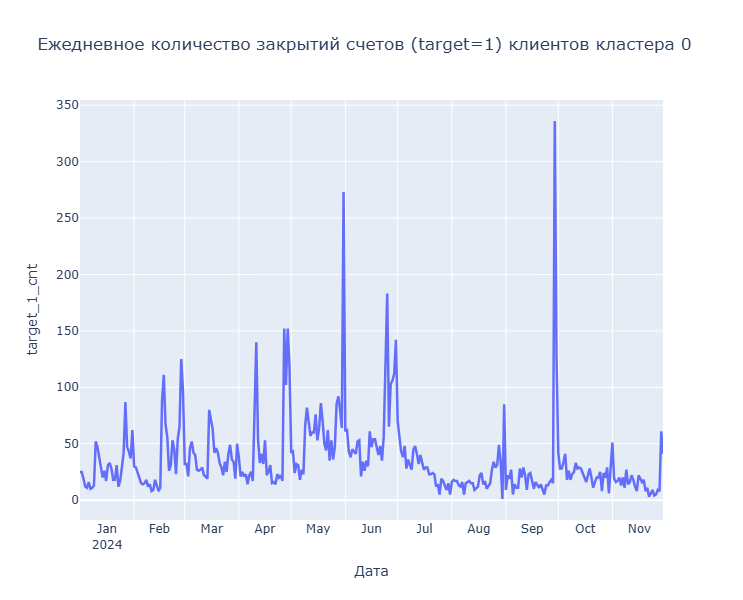

In [ ]:
make_lineplot_target_1_by_date(df_by_date_cluster_0, 0)

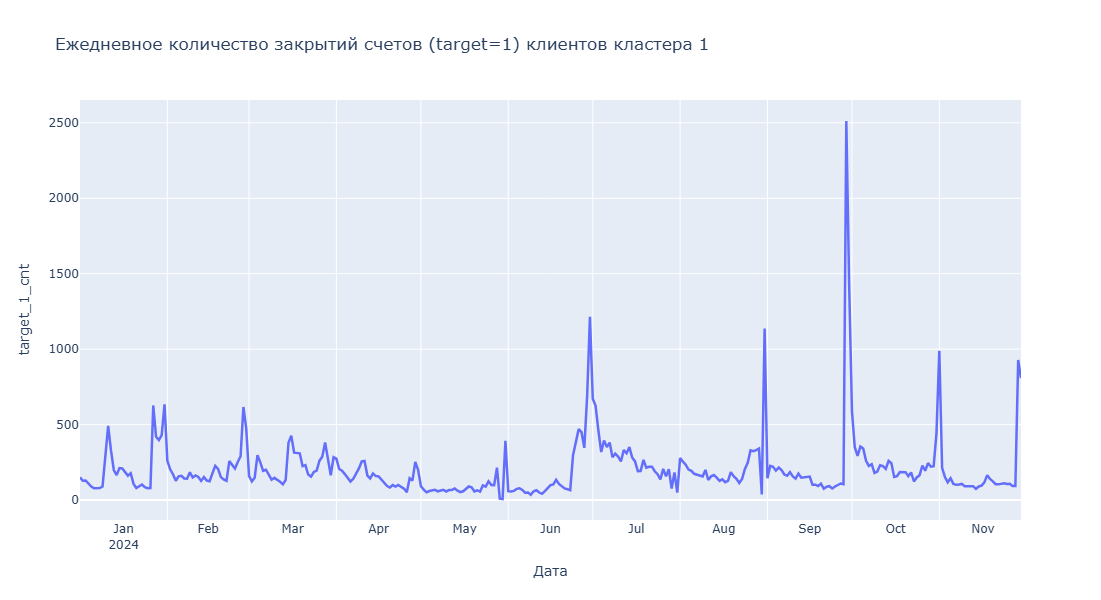

In [ ]:
make_lineplot_target_1_by_date(df_by_date_cluster_1, 1)

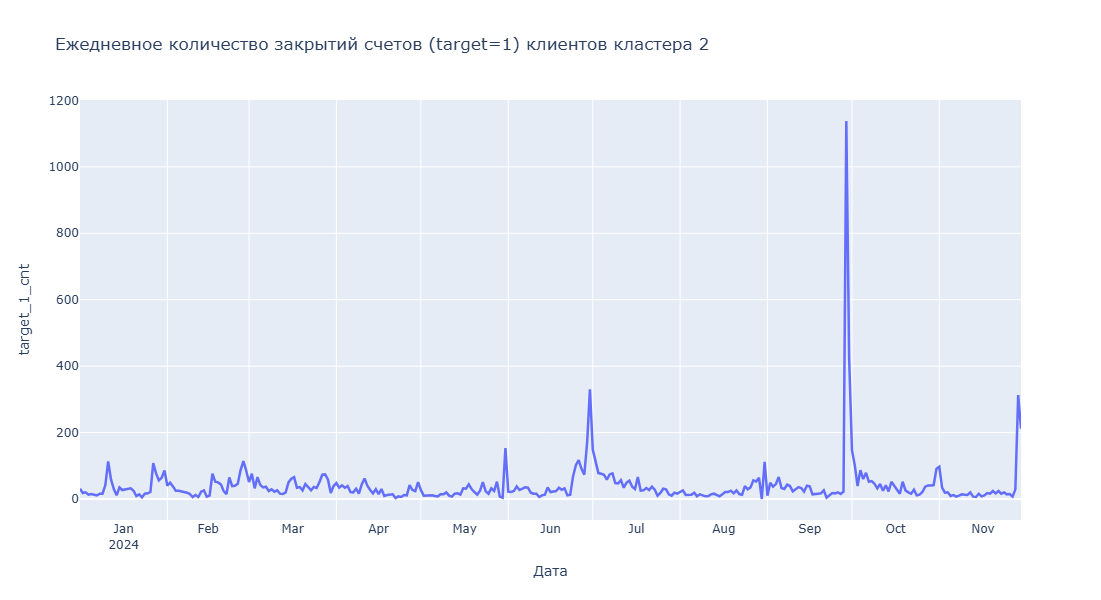

In [ ]:
make_lineplot_target_1_by_date(df_by_date_cluster_2, 2)

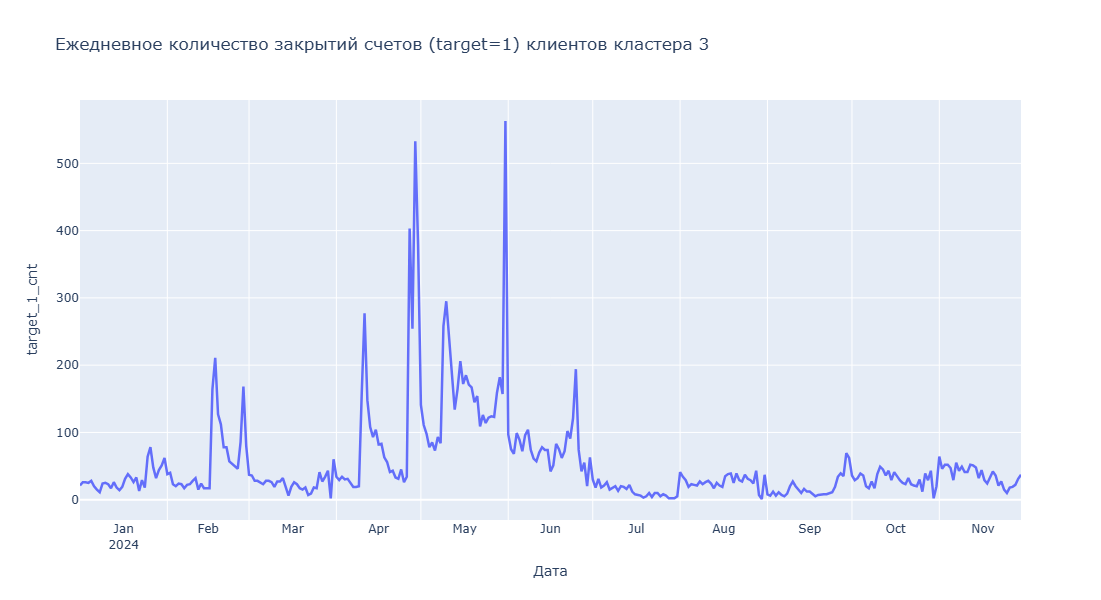

In [ ]:
make_lineplot_target_1_by_date(df_by_date_cluster_3, 3)

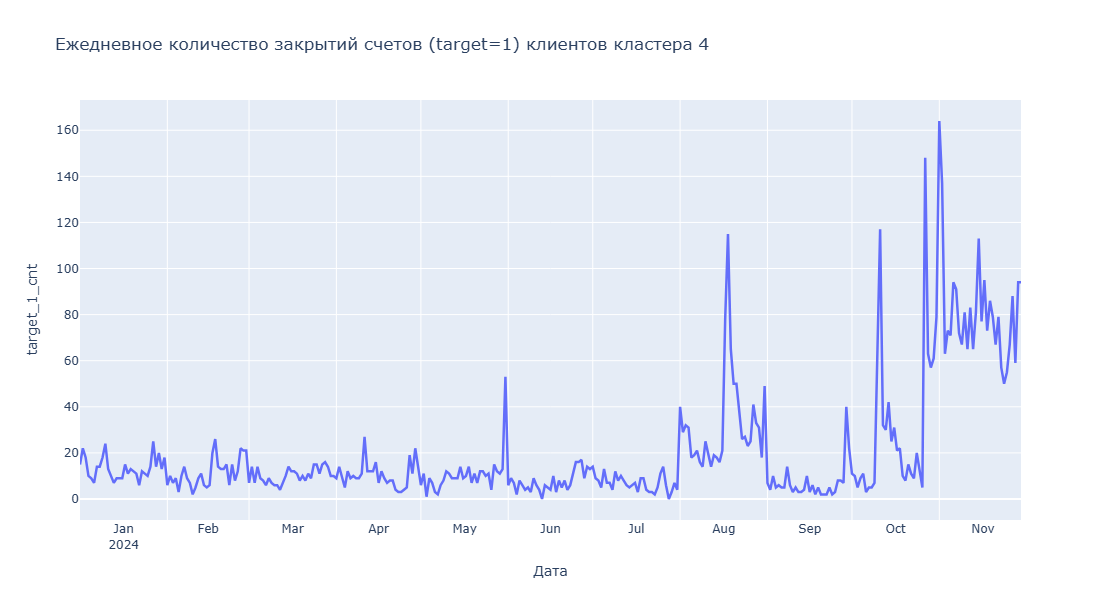

In [ ]:
make_lineplot_target_1_by_date(df_by_date_cluster_4, 4)

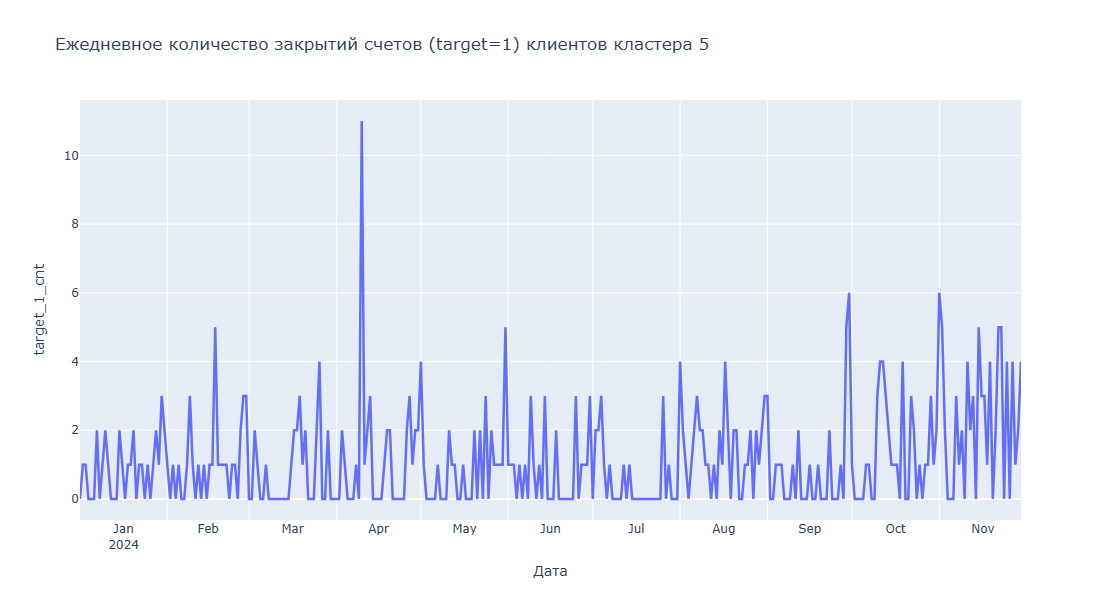

In [ ]:
make_lineplot_target_1_by_date(df_by_date_cluster_5, 5)

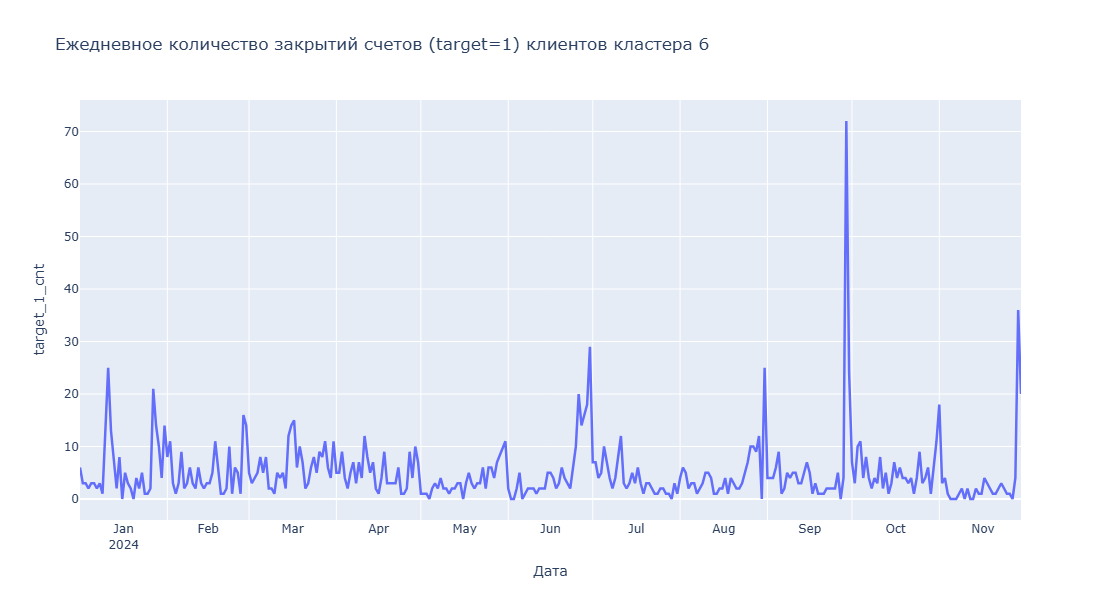

In [ ]:
make_lineplot_target_1_by_date(df_by_date_cluster_6, 6)

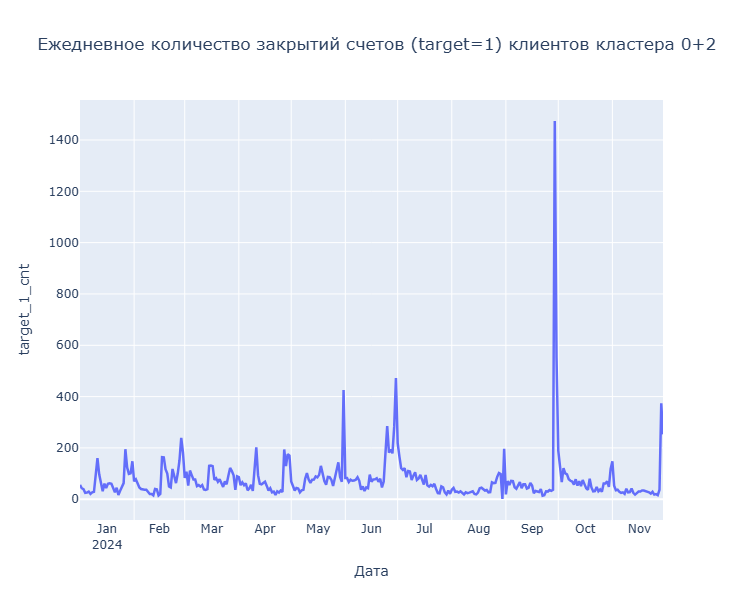

In [ ]:
make_lineplot_target_1_by_date(df_by_date_cluster_02, '0+2')

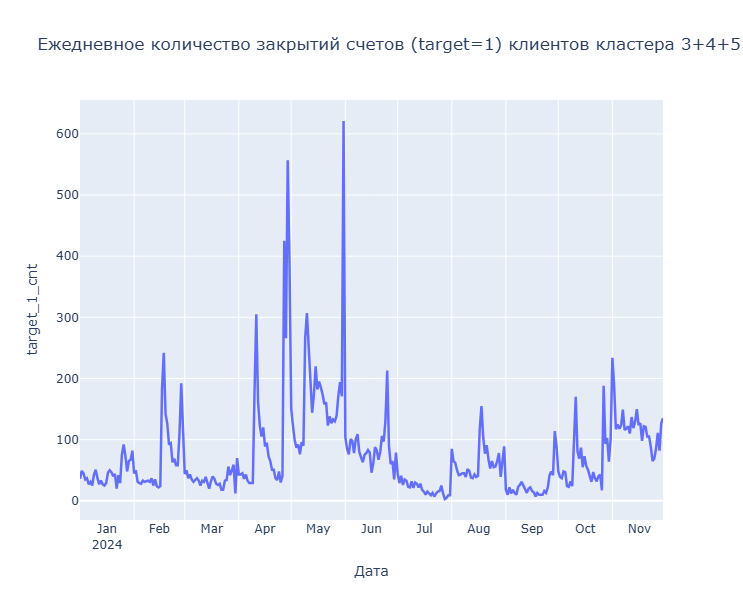

In [ ]:
make_lineplot_target_1_by_date(df_by_date_cluster_345, '3+4+5')

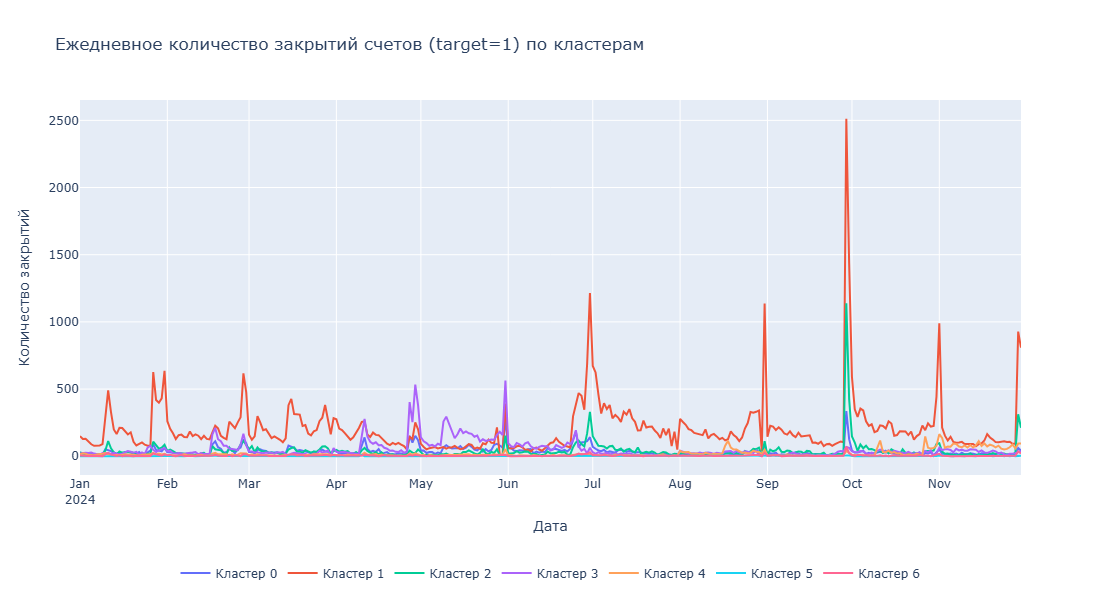

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

def make_lineplot_target_1_by_date_combined(df_list, cluster_numbers):
    fig = go.Figure()

    colors = px.colors.qualitative.Plotly

    for i, (df, num) in enumerate(zip(df_list, cluster_numbers)):
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')

        fig.add_trace(
            go.Scatter(
                x=df['date'],
                y=df['target_1_cnt'],
                name=f'Кластер {num}',
                line=dict(width=2, color=colors[i % len(colors)]),
                hovertemplate=(
                    '<b>Дата:</b> %{x|%d %b %Y}<br>'
                    '<b>Кластер {num}:</b> %{y}<extra></extra>'
                )
            )
        )

    fig.update_layout(
        title='Ежедневное количество закрытий счетов (target=1) по кластерам',
        xaxis_title='Дата',
        yaxis_title='Количество закрытий',
        width=1200,
        height=600,
        hovermode='x unified',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.3,
            xanchor="center",
            x=0.5
        ),
        xaxis=dict(
            dtick="M1",
            tickformat="%b\n%Y",
            showspikes=True,
            spikemode='across',
            spikesnap='cursor'
        )
    )

    fig.show()

df_list = [df_by_date_cluster_0, df_by_date_cluster_1, df_by_date_cluster_2, df_by_date_cluster_3, df_by_date_cluster_4, df_by_date_cluster_5, df_by_date_cluster_6]
cluster_numbers = [0, 1, 2, 3, 4, 5, 6]
make_lineplot_target_1_by_date_combined(df_list, cluster_numbers)

In [ ]:
df_outside_factors = pd.read_csv('outside_factors.csv', sep = ',')
df_outside_factors['date'] = pd.to_datetime(df_outside_factors['date'], format='%Y-%m-%d')
df_outside_factors.head()

date  dollar_price  mortgage_rate  moex_price  keyrate  inflation  \
0 2024-01-01          89.5           7.91         NaN     16.0       7.44   
1 2024-01-02          89.3           7.91         NaN     16.0       7.44   
2 2024-01-03          89.1           7.91    3115.005     16.0       7.44   
3 2024-01-04          88.9           7.91    3138.365     16.0       7.44   
4 2024-01-05          88.7           7.91    3137.320     16.0       7.44   

   yield  snp500_price  gold_price  btc_price  
0   4.18           NaN         NaN    43224.0  
1   4.18       4744.02     2063.95    44573.0  
2   4.18       4714.94     2034.20    43905.0  
3   4.19       4693.05     2041.95    43518.0  
4   4.21       4693.91     2043.45    44178.0

In [ ]:
def create_df_outside_factors_cluster_num (target_column, df_outside_factors):

  df_outside_factors_target_cluster_num = df_outside_factors.merge(target_column, how='inner', on='date')
  return df_outside_factors_target_cluster_num

In [ ]:
df_outside_factors_target_cluster_0 = create_df_outside_factors_cluster_num(df_by_date_cluster_0, df_outside_factors)
df_outside_factors_target_cluster_1 = create_df_outside_factors_cluster_num(df_by_date_cluster_1, df_outside_factors)
df_outside_factors_target_cluster_2 = create_df_outside_factors_cluster_num(df_by_date_cluster_2, df_outside_factors)
df_outside_factors_target_cluster_3 = create_df_outside_factors_cluster_num(df_by_date_cluster_3, df_outside_factors)
df_outside_factors_target_cluster_4 = create_df_outside_factors_cluster_num(df_by_date_cluster_4, df_outside_factors)
df_outside_factors_target_cluster_5 = create_df_outside_factors_cluster_num(df_by_date_cluster_5, df_outside_factors)
df_outside_factors_target_cluster_6 = create_df_outside_factors_cluster_num(df_by_date_cluster_6, df_outside_factors)
df_outside_factors_target_cluster_02 = create_df_outside_factors_cluster_num(df_by_date_cluster_02, df_outside_factors)
df_outside_factors_target_cluster_345 = create_df_outside_factors_cluster_num(df_by_date_cluster_345, df_outside_factors)

In [ ]:
def count_correlations_spearman_outside_factors(df_outside_factors, num):

  corr_matrix = df_outside_factors[['dollar_price', 'mortgage_rate', 'moex_price', 'keyrate', 'gold_price', 'inflation', 'yield', 'snp500_price', 'btc_price', 'target_1_cnt']].corr(method='spearman')

  target_corr = corr_matrix[['target_1_cnt']].drop('target_1_cnt')

  plt.figure(figsize=(8, 6))
  sns.heatmap(target_corr.sort_values('target_1_cnt', ascending=False),
              annot=True,
              cmap='coolwarm',
              center=0,
              vmin=-1, vmax=1,
              fmt=".2f",
              linewidths=.5,
              cbar_kws={'label': 'Коэффициент корреляции Спирмена'})

  plt.title('Корреляция внешних факторов с количеством закрытий счетов кластер ' + str(num))
  plt.tight_layout()
  plt.show()

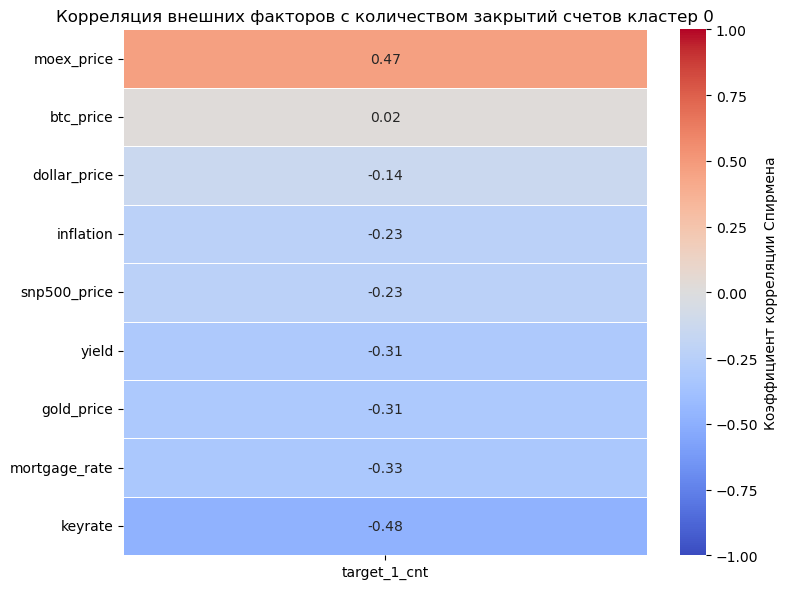

In [ ]:
count_correlations_spearman_outside_factors(df_outside_factors_target_cluster_0, 0)

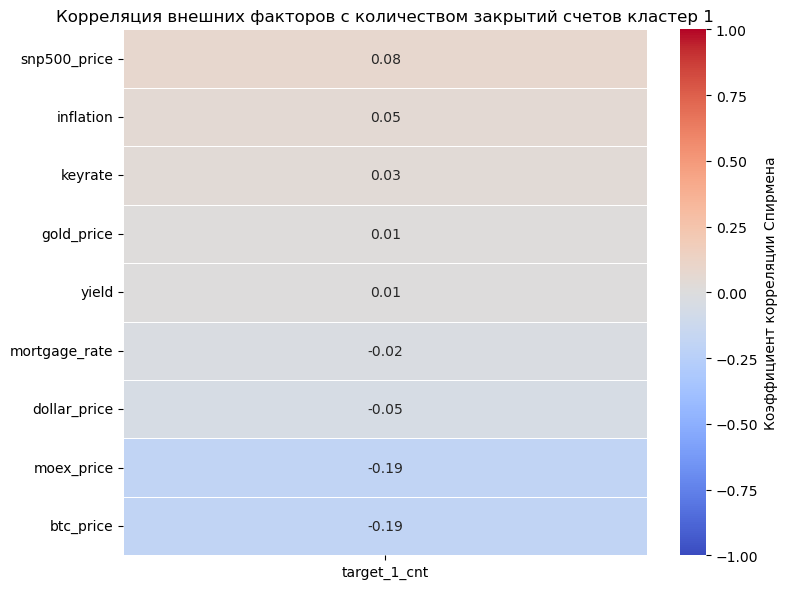

In [ ]:
count_correlations_spearman_outside_factors(df_outside_factors_target_cluster_1, 1)

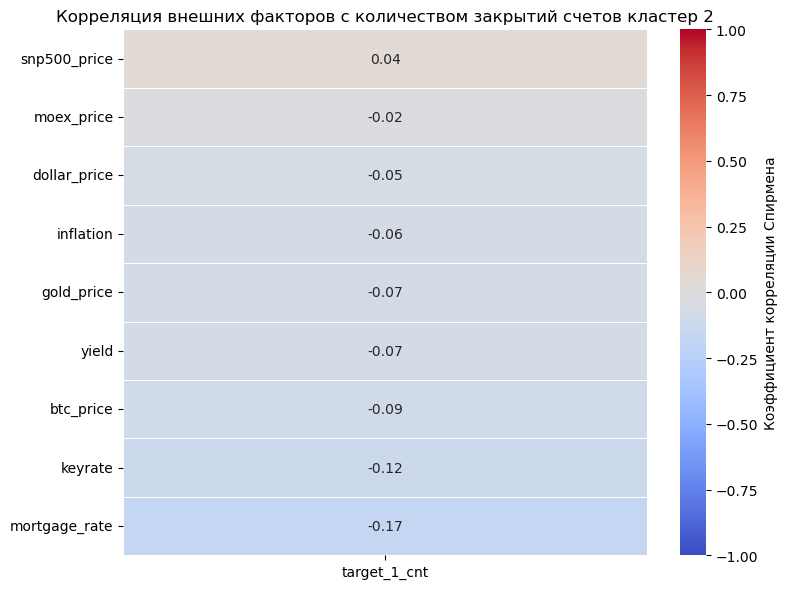

In [ ]:
count_correlations_spearman_outside_factors(df_outside_factors_target_cluster_2, 2)

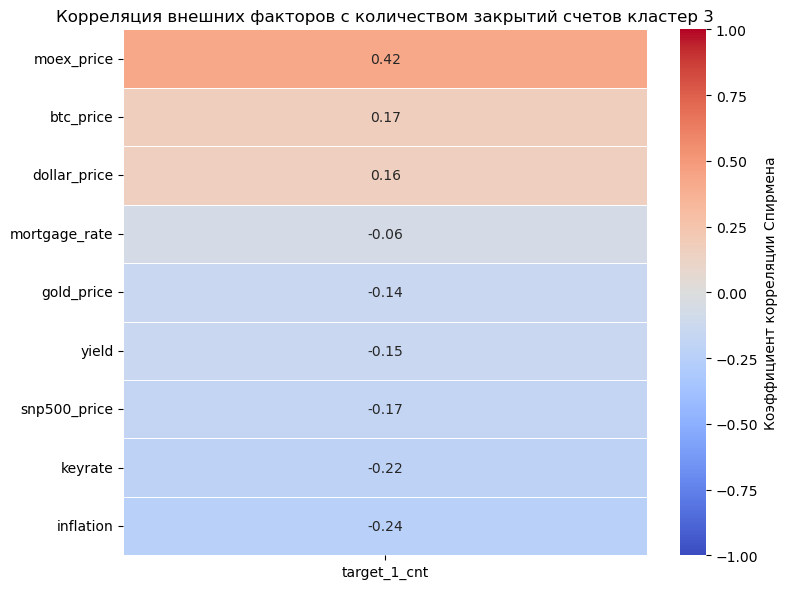

In [ ]:
count_correlations_spearman_outside_factors(df_outside_factors_target_cluster_3, 3)

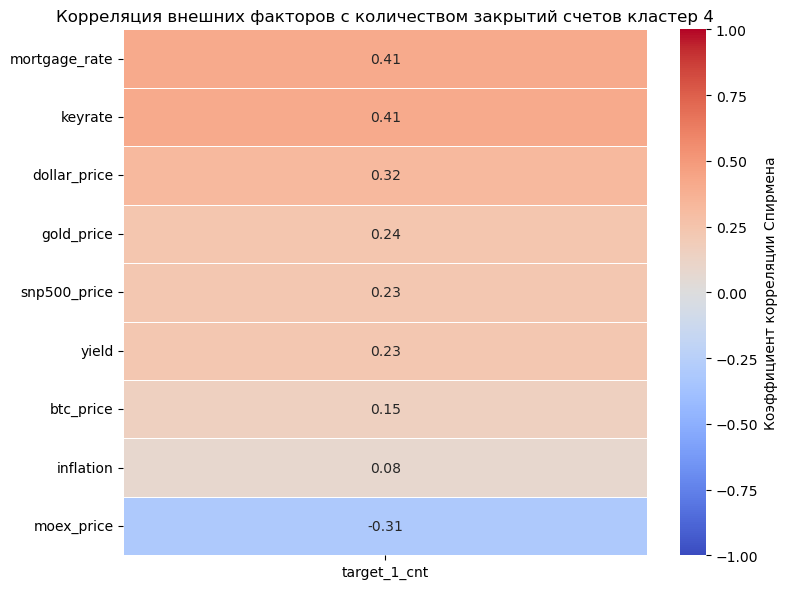

In [ ]:
count_correlations_spearman_outside_factors(df_outside_factors_target_cluster_4, 4)

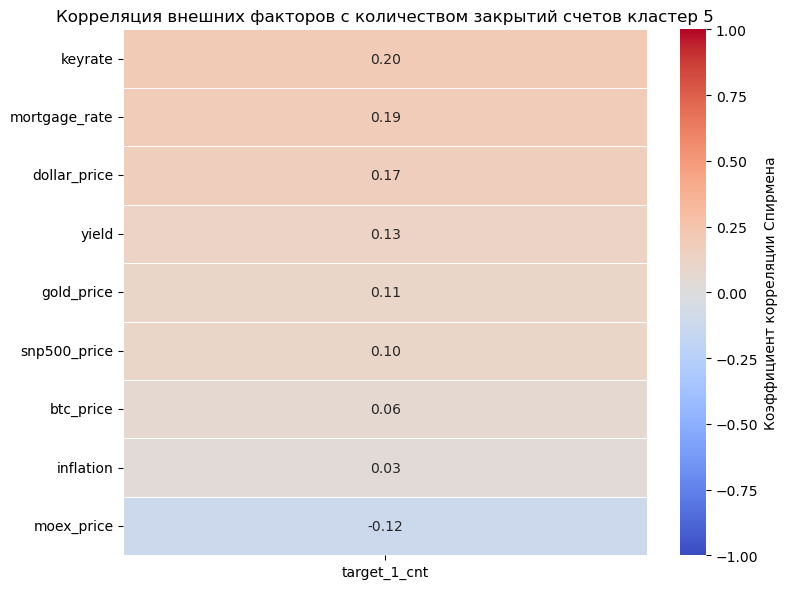

In [ ]:
count_correlations_spearman_outside_factors(df_outside_factors_target_cluster_5, 5)

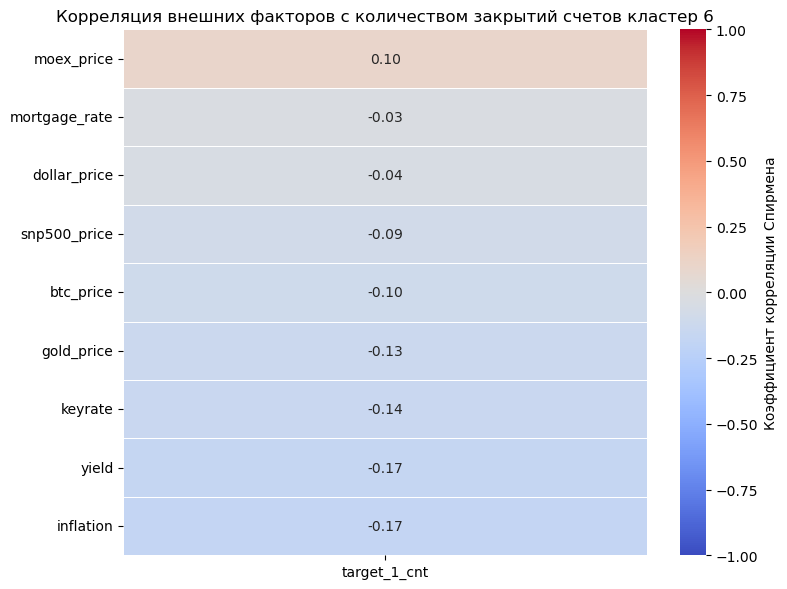

In [ ]:
count_correlations_spearman_outside_factors(df_outside_factors_target_cluster_6, 6)

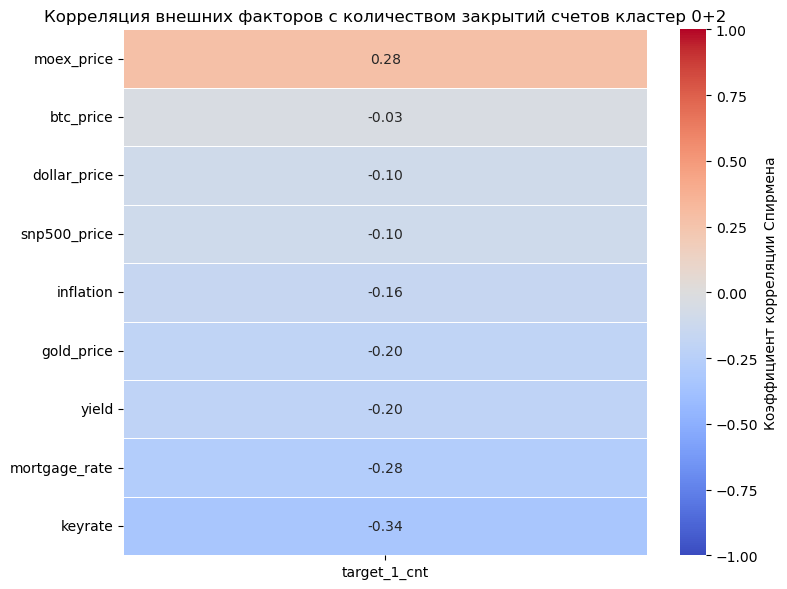

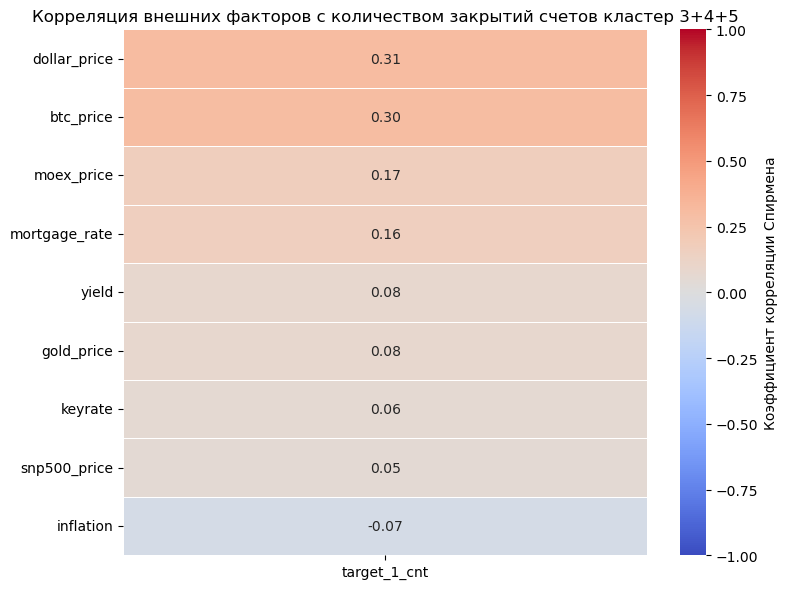

In [ ]:
count_correlations_spearman_outside_factors(df_outside_factors_target_cluster_02, '0+2')
count_correlations_spearman_outside_factors(df_outside_factors_target_cluster_345, '3+4+5')

In [8]:
import pandas as pd
df = pd.read_csv('df_v2.csv', sep = ',')

In [9]:
df.head()

expiration_minus_1d_dt      id  target  renewal_amt  \
0             2024-03-18   65757       0          100   
1             2024-05-26  302422       0         1000   
2             2024-02-22  325078       0         1000   
3             2024-01-15  284248       0          200   
4             2024-02-24  151409       1          200   

   one_prc_loyalty_accrual_rub_amt  sovokupnyj_balans  sovokupnye_traty  \
0                              0.0              200.0              20.0   
1                              0.0             1000.0              20.0   
2                              0.0             2800.0              20.0   
3                              1.0             1000.0             200.0   
4                              2.0              200.0             200.0   

   median_monthly_income_amt  monthly_income_amt  \
0                      100.0               100.0   
1                       20.0               200.0   
2                       20.0               100.0   
3                      200.0               100.0   
4                      100.0               200.0   

   avg_integral_cur_rur_balance  ...  sov_bal_0_3  sov_bal_4_6 sov_bal_7_12  \
0                          20.0  ...     5.303305     0.000000     0.000000   
1                          20.0  ...     6.908755     6.908755     0.000000   
2                           2.0  ...     8.630700     8.630700     0.000000   
3                           2.0  ...     0.000000     0.000000     6.908755   
4                          20.0  ...     5.303305     0.000000     0.000000   

   sov_bal_12_plus  sov_traty_total  sov_traty_0_3  sov_traty_4_6  \
0              0.0         3.044522       3.044522       0.000000   
1              0.0         3.713572       3.044522       3.044522   
2              0.0         4.394449       3.713572       3.713572   
3              0.0         5.303305       0.000000       0.000000   
4              0.0         5.303305       5.303305       0.000000   

  sov_traty_7_12 sov_traty_12_plus cluster  
0       0.000000               0.0     6.0  
1       0.000000               0.0     0.0  
2       0.000000               0.0     0.0  
3       5.303305               0.0     4.0  
4       0.000000               0.0     1.0  

[5 rows x 281 columns]

In [10]:
# Пример: разделение по столбцу 'category'
grouped = df.groupby('cluster')  # группируем по столбцу
dfs_dict = {key: group for key, group in grouped}  # словарь {значение: DataFrame}

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
# import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import statsmodels.api as sm

[LightGBM] [Info] Number of positive: 4719, number of negative: 29968
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 155
[LightGBM] [Info] Number of data points in the train set: 34687, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Accuracy: 0.65
Precision: 0.21
Recall: 0.56
F1 Score: 0.30
ROC AUC: 0.65


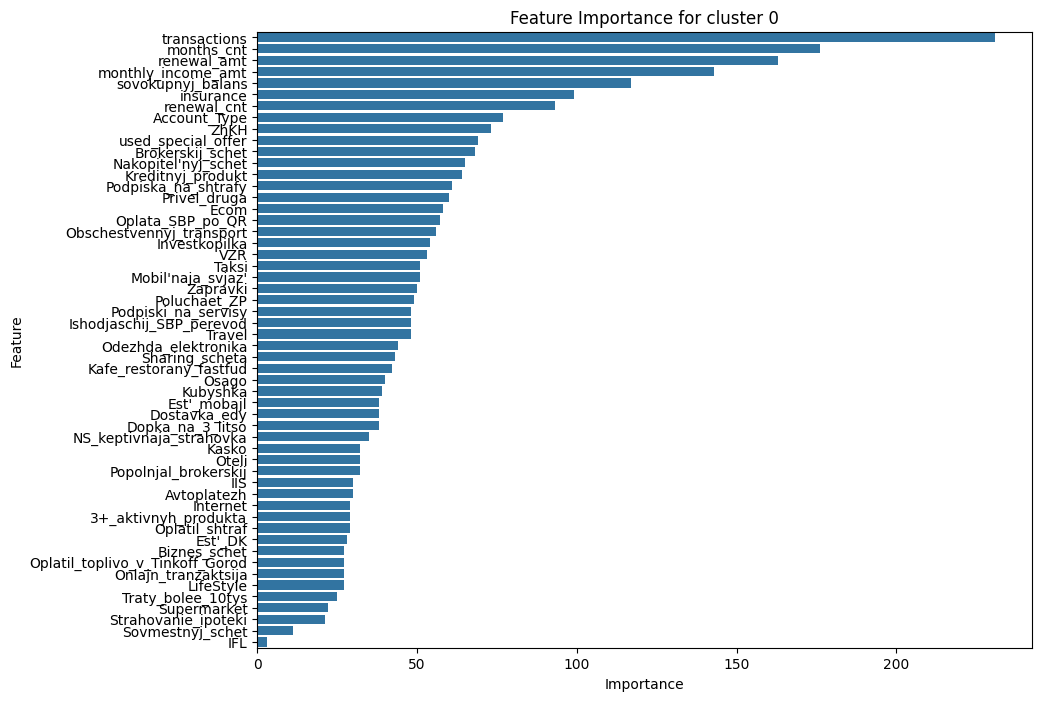

Top features influencing user retention (target=0):
                            Feature  Importance
19                     transactions         231
38                       months_cnt         176
47                      renewal_amt         163
18               monthly_income_amt         143
15                sovokupnyj_balans         117
16                        insurance          99
40                      renewal_cnt          93
44                     Account_Type          77
30                             ZhKH          73
53               used_special_offer          69
17                 Brokerskij_schet          68
22              Nakopitel'nyj_schet          65
39                Kreditnyj_produkt          64
10              Podpiska_na_shtrafy          61
13                     Privel_druga          60
4                              Ecom          58
48                 Oplata_SBP_po_QR          57
34         Obschestvennyj_transport          56
14                    Investkopilka 

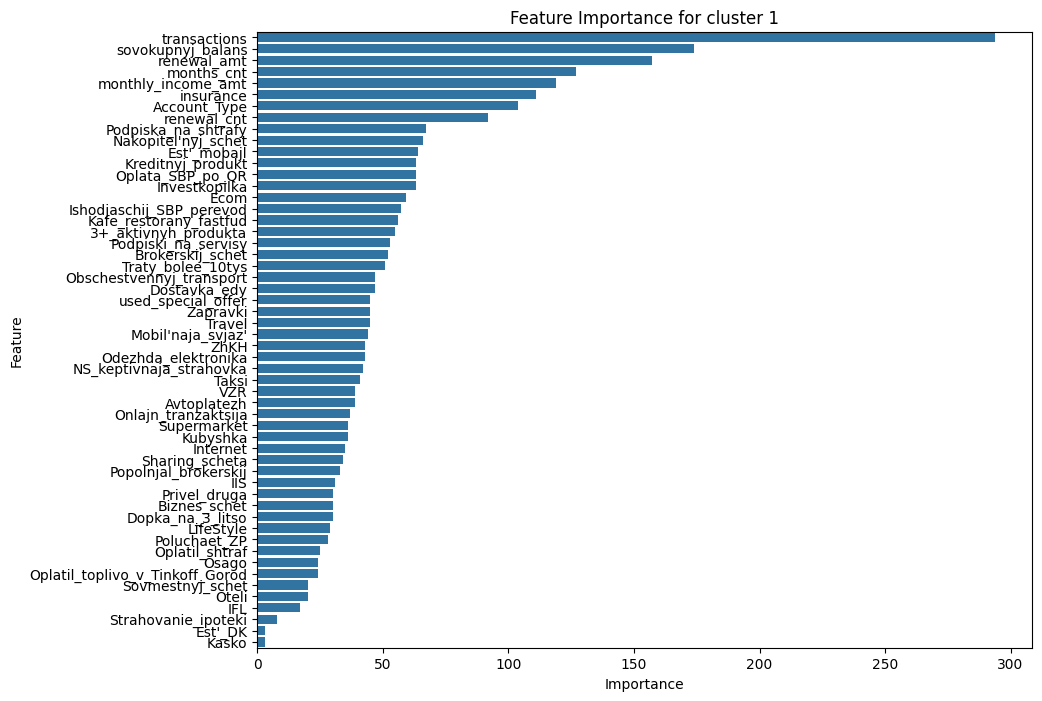

Top features influencing user retention (target=0):
                            Feature  Importance
19                     transactions         294
15                sovokupnyj_balans         174
47                      renewal_amt         157
38                       months_cnt         127
18               monthly_income_amt         119
16                        insurance         111
44                     Account_Type         104
40                      renewal_cnt          92
10              Podpiska_na_shtrafy          67
22              Nakopitel'nyj_schet          66
23                      Est'_mobajl          64
39                Kreditnyj_produkt          63
48                 Oplata_SBP_po_QR          63
14                    Investkopilka          63
4                              Ecom          59
3          Ishodjaschij_SBP_perevod          57
1            Kafe_restorany_fastfud          56
29             3+_aktivnyh_produkta          55
32              Podpiski_na_servisy 

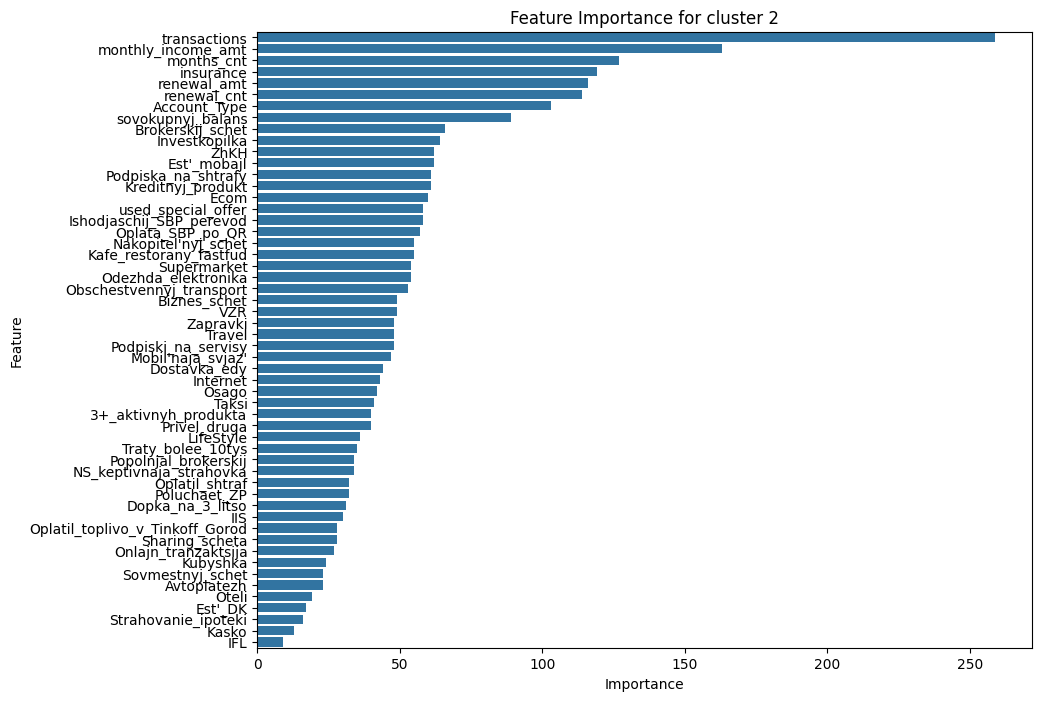

Top features influencing user retention (target=0):
                            Feature  Importance
19                     transactions         259
18               monthly_income_amt         163
38                       months_cnt         127
16                        insurance         119
47                      renewal_amt         116
40                      renewal_cnt         114
44                     Account_Type         103
15                sovokupnyj_balans          89
17                 Brokerskij_schet          66
14                    Investkopilka          64
30                             ZhKH          62
23                      Est'_mobajl          62
10              Podpiska_na_shtrafy          61
39                Kreditnyj_produkt          61
4                              Ecom          60
53               used_special_offer          58
3          Ishodjaschij_SBP_perevod          58
48                 Oplata_SBP_po_QR          57
22              Nakopitel'nyj_schet 

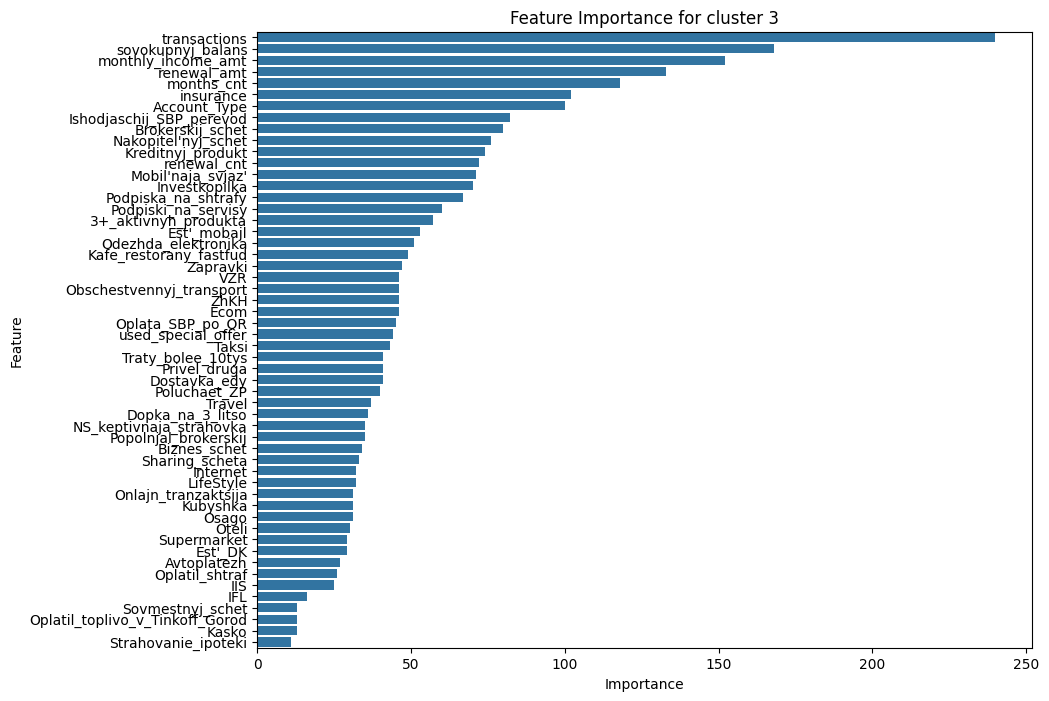

Top features influencing user retention (target=0):
                            Feature  Importance
19                     transactions         240
15                sovokupnyj_balans         168
18               monthly_income_amt         152
47                      renewal_amt         133
38                       months_cnt         118
16                        insurance         102
44                     Account_Type         100
3          Ishodjaschij_SBP_perevod          82
17                 Brokerskij_schet          80
22              Nakopitel'nyj_schet          76
39                Kreditnyj_produkt          74
40                      renewal_cnt          72
26                Mobil'naja_svjaz'          71
14                    Investkopilka          70
10              Podpiska_na_shtrafy          67
32              Podpiski_na_servisy          60
29             3+_aktivnyh_produkta          57
23                      Est'_mobajl          53
46              Odezhda_elektronika 

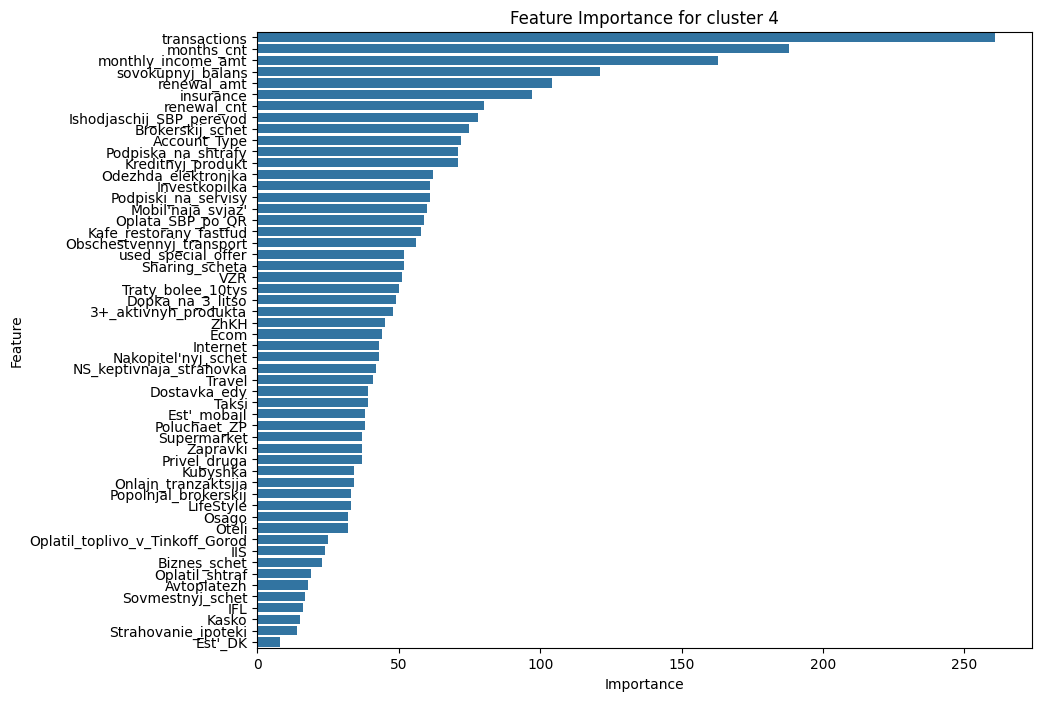

Top features influencing user retention (target=0):
                            Feature  Importance
19                     transactions         261
38                       months_cnt         188
18               monthly_income_amt         163
15                sovokupnyj_balans         121
47                      renewal_amt         104
16                        insurance          97
40                      renewal_cnt          80
3          Ishodjaschij_SBP_perevod          78
17                 Brokerskij_schet          75
44                     Account_Type          72
10              Podpiska_na_shtrafy          71
39                Kreditnyj_produkt          71
46              Odezhda_elektronika          62
14                    Investkopilka          61
32              Podpiski_na_servisy          61
26                Mobil'naja_svjaz'          60
48                 Oplata_SBP_po_QR          59
1            Kafe_restorany_fastfud          58
34         Obschestvennyj_transport 

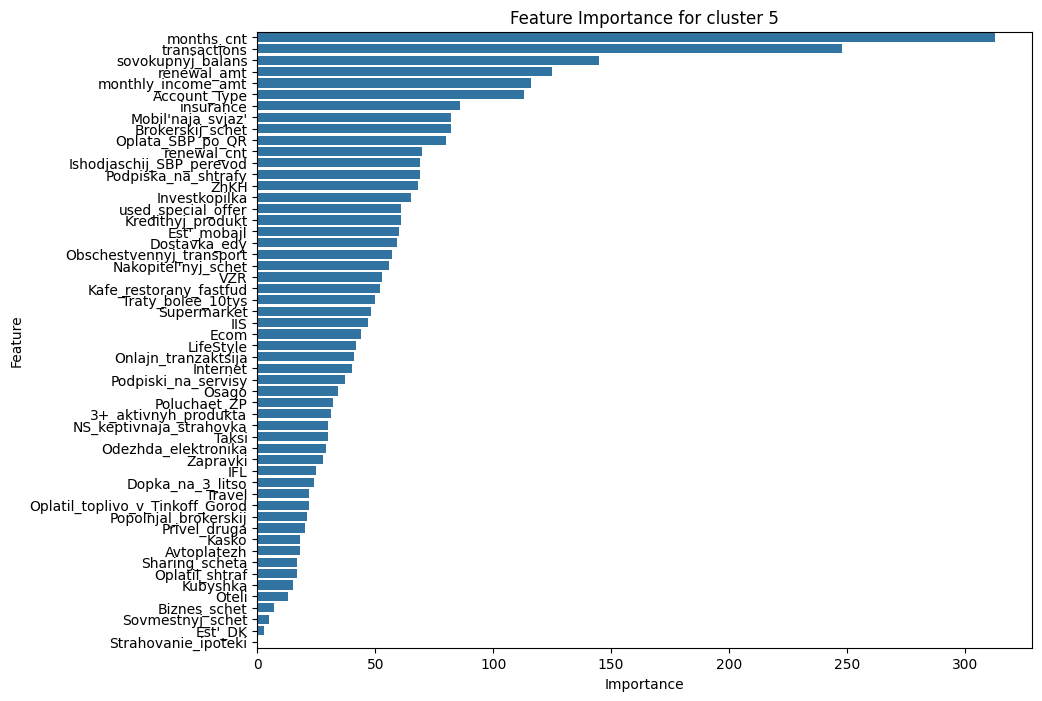

Top features influencing user retention (target=0):
                            Feature  Importance
38                       months_cnt         313
19                     transactions         248
15                sovokupnyj_balans         145
47                      renewal_amt         125
18               monthly_income_amt         116
44                     Account_Type         113
16                        insurance          86
26                Mobil'naja_svjaz'          82
17                 Brokerskij_schet          82
48                 Oplata_SBP_po_QR          80
40                      renewal_cnt          70
3          Ishodjaschij_SBP_perevod          69
10              Podpiska_na_shtrafy          69
30                             ZhKH          68
14                    Investkopilka          65
53               used_special_offer          61
39                Kreditnyj_produkt          61
23                      Est'_mobajl          60
24                     Dostavka_edy 

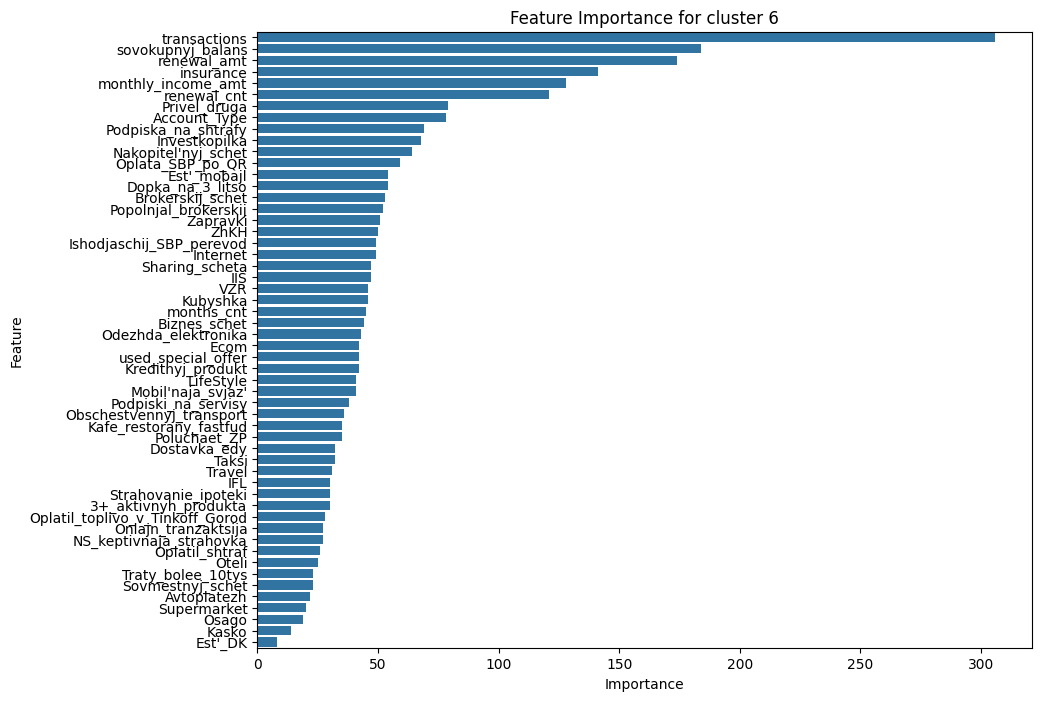

Top features influencing user retention (target=0):
                            Feature  Importance
19                     transactions         306
15                sovokupnyj_balans         184
47                      renewal_amt         174
16                        insurance         141
18               monthly_income_amt         128
40                      renewal_cnt         121
13                     Privel_druga          79
44                     Account_Type          78
10              Podpiska_na_shtrafy          69
14                    Investkopilka          68
22              Nakopitel'nyj_schet          64
48                 Oplata_SBP_po_QR          59
23                      Est'_mobajl          54
31                 Dopka_na_3_litso          54
17                 Brokerskij_schet          53
42             Popolnjal_brokerskij          52
20                         Zapravki          51
30                             ZhKH          50
3          Ishodjaschij_SBP_perevod 

In [16]:
for i in [0, 1, 2, 3, 4, 5, 6, ]:
    df = dfs_dict[i]
    df = df.drop_duplicates()
    y = df['target']

    # df0= df0.drop(columns=['target', "expiration_minus_1d_dt", "education_level_cd", "risk_level_cd", "time_zone_delta_tm", "gender_cd", "marital_status_cd", "Vklad", "authorization_type_cd"] )
    X = df[list(set(['IFL', 'Strahovanie_ipoteki', 'Kasko', 'VZR', 'Osago', 'NS_keptivnaja_strahovka',
    'Oteli', 'Travel', 'Oplatil_toplivo_v_Tinkoff_Gorod', 'Oplatil_shtraf',
    'LifeStyle', 'ZhKH', 'Taksi', 'Zapravki', 'Dostavka_edy', 'Odezhda_elektronika',
    'Ecom', 'Obschestvennyj_transport', 'Internet', "Mobil'naja_svjaz'",
    'Kafe_restorany_fastfud', 'Onlajn_tranzaktsija', 'Supermarket',
    '3+_aktivnyh_produkta', 'Traty_bolee_10tys',
    'Poluchaet_ZP', 'Sovmestnyj_schet', 'IIS', 'Sharing_scheta', 'Kubyshka',
    'Popolnjal_brokerskij', 'Dopka_na_3_litso', 'Biznes_schet', 'Privel_druga',
    "Est'_mobajl", 'Investkopilka', "Nakopitel'nyj_schet", 'Brokerskij_schet',
    'Kreditnyj_produkt', "Est'_DK", 'used_special_offer',
     'Oplata_SBP_po_QR', 'Ishodjaschij_SBP_perevod',
     "transactions", "insurance", "Account_Type",  "Podpiska_na_shtrafy",
    "Podpiski_na_servisy","Avtoplatezh", "insurance", "transactions",  "Podpiska_na_shtrafy", "Account_Type", 'renewal_amt', 'sovokupnyj_balans', 'months_cnt',  'monthly_income_amt',  'renewal_cnt',  '3+_aktivnyh_produkta', 'Popolnjal_brokerskij',  'Travel',  'Osago', 'Privel_druga', 'Oteli', 'Strahovanie_ipoteki',  'IIS', 'Oplatil_toplivo_v_Tinkoff_Gorod', 'Sharing_scheta', 'LifeStyle', 'Poluchaet_ZP', 'Kubyshka', 'Dopka_na_3_litso',  'Avtoplatezh', 'Sovmestnyj_schet']))]

    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Создание и обучение модели LightGBM
    model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)

    # Предсказания и оценка модели
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")

    # Важность признаков
    feature_importances = model.feature_importances_
    features = X.columns

    # Создание DataFrame с важностью признаков
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Визуализация важности признаков
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importance for cluster {i}')
    plt.show()

    # Вывод наиболее значимых признаков
    print("Top features influencing user retention (target=0):")
    print(importance_df)